## Simple Linear regression using tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

B:\tookits\Anaconda3\envs\DL\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Step1 - Loading the data

In [2]:
data_file = './stanford-tensorflow-tutorials/examples/data/birth_life_2010.txt'

with open(data_file, 'r') as f:
    
    header = f.readline().strip().split('\t')
    
    data = [each_line.strip().split('\t') for each_line in f]

In [3]:
header

['Country', 'Birth rate', 'Life expectancy']

In [4]:
data

[['Vietnam', '1.822', '74.828243902'],
 ['Vanuatu', '3.869', '70.819487805'],
 ['Tonga', '3.911', '72.150658537'],
 ['Timor-Leste', '5.578', '61.999853659'],
 ['Thailand', '1.579', '73.927658537'],
 ['Solomon Islands', '4.229', '67.465195122'],
 ['Singapore', '1.15', '81.641463415'],
 ['Samoa', '3.86', '72.306390244'],
 ['Philippines', '3.142', '68.484317073'],
 ['Papua New Guinea', '3.951', '62.440609756'],
 ['New Zealand', '2.16', '80.702439024'],
 ['New Caledonia', '2.141', '76.301682927'],
 ['Myanmar', '2.002', '64.662097561'],
 ['Mongolia', '2.504', '68.194975610'],
 ['Micronesia', '3.451', '68.764829268'],
 ['Malaysia', '2.635', '74.024560976'],
 ['Macao SAR, China', '1.092', '80.775317073'],
 ['Lao PDR', '2.747', '67.064'],
 ['Korea', '1.22', '80.761951220'],
 ['Japan', '1.39', '82.932682927'],
 ['Indonesia', '2.117', '68.889658537'],
 ['Hong Kong SAR, China', '1.108', '82.878048780'],
 ['Guam', '2.47', '75.994268293'],
 ['French Polynesia', '2.09', '75.076878049'],
 ['Fiji', '2

#### Step2 - Create placeholders for x and y with are birthrate and life expectancy respectively. Also x and y are scalars with type float

In [5]:
X = tf.placeholder(dtype=tf.float32, name='X')
Y = tf.placeholder(dtype=tf.float32, name='Y')

#### Step 3 - Create weights and bias

In [ ]:
tf.reset_default_graph()

In [6]:
W = tf.get_variable('W', shape=None, dtype=tf.float32, initializer=tf.constant(0.))
b = tf.get_variable('b', shape=None, dtype=tf.float32, initializer=tf.constant(0.))

#### Step 4 - Inference

In [7]:
Y_predicted = W * X + b

#### Step 5 - Loss function

In [8]:
loss = tf.square(Y - Y_predicted, name='loss')

#### Step6 - Create optimizer

In [9]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = opt.minimize(loss)

#### Step 7 - Train and create file writer before running the session and after defining all the ops and the graph. Also initialize all the variables using the global variable initializer

In [10]:
writer = tf.summary.FileWriter('./graphs/', tf.get_default_graph())

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        
        total_loss = 0
        
        for _, x, y in data:
            
            _, loss_ = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            
            
            total_loss += loss_
        
        print('Epoc {0}: {1}'.format(i, total_loss / len(data)))
        
    writer.close()

    w_out, b_out = W.eval(), b.eval()

Epoc 0: 490.15911085312007
Epoc 1: 263.7506569439447
Epoc 2: 159.36683598599936
Epoc 3: 101.5251783138589
Epoc 4: 69.41204028131538
Epoc 5: 51.537577171877366
Epoc 6: 41.5549916909738
Epoc 7: 35.95518043831628
Epoc 8: 32.79587873974141
Epoc 9: 31.000316145585998
Epoc 10: 29.970275642257185
Epoc 11: 29.372525305186986
Epoc 12: 29.020744182177403
Epoc 13: 28.81027701647223
Epoc 14: 28.681947983099196
Epoc 15: 28.60207020171771
Epoc 16: 28.551251236620164
Epoc 17: 28.518188113740056
Epoc 18: 28.496230050335075
Epoc 19: 28.481361998880196
Epoc 20: 28.471084763798373
Epoc 21: 28.463894468659877
Epoc 22: 28.45879525461381
Epoc 23: 28.455126776264393
Epoc 24: 28.45248662592402
Epoc 25: 28.450571222223438
Epoc 26: 28.449163216394126
Epoc 27: 28.44812770580971
Epoc 28: 28.44738010868038
Epoc 29: 28.446812518921337
Epoc 30: 28.446411356761267
Epoc 31: 28.446103875586566
Epoc 32: 28.44587420321707
Epoc 33: 28.445709196050455
Epoc 34: 28.445582969202416
Epoc 35: 28.445495191563264
Epoc 36: 28.4454

(190, 2)


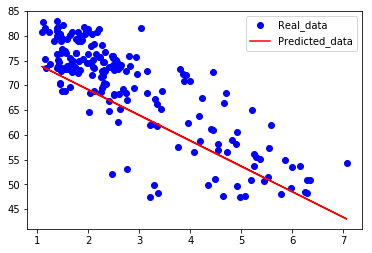

In [24]:
npdata = np.array(np.array(data)[:, 1:], dtype=float)
plt.plot(npdata[:, 0], npdata[:, 1], 'bo', label='Real_data')
plt.plot(npdata[:, 0], npdata[:, 0] * w_out + b_out, 'r', label='Predicted_data')
plt.legend()
plt.show()